# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

## Analizzo e pulisco i dati

In [18]:
import numpy
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pyogrio
import fiona


print(f"Fiona version: {fiona.__version__}")
print(f"Geopandas version: {gpd.__version__}")

Fiona version: 1.10.1
Geopandas version: 1.0.1


In [2]:
data_directory = "./data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')
reviews_rotten_df

,rotten_tomatoes_link,movie_title,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...,...
1129882,m/zulu_dawn,Zulu Dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1129883,m/zulu_dawn,Zulu Dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1129884,m/zulu_dawn,Zulu Dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1129885,m/zulu_dawn,Zulu Dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


## Quale paese ha vinto più oscar?

## Chi ha prodotto più film?

In [3]:
movies_per_year_df = movies_df[['id', 'date']].copy()
movies_per_year_df.dtypes

id        int64
date    float64
dtype: object

In [4]:
movies_per_year_df.dropna(axis=0,inplace=True)
movies_per_year_df['date'] =movies_per_year_df['date'].astype(int)
movies_per_year_df.dtypes

id      int64
date    int32
dtype: object

In [5]:
print(movies_per_year_df.duplicated().sum())

0


In [6]:
new_country_df = countries_df.copy()
new_country_df.dropna(axis=0,inplace=True)
print(new_country_df.duplicated().sum())

0


In [7]:
new_country_df.dtypes

id          int64
country    object
dtype: object

In [8]:
new_country_df['country']=new_country_df['country'].astype('string')
new_country_df.dtypes

id                  int64
country    string[python]
dtype: object

In [9]:
movies_per_year_df = pd.merge(movies_per_year_df,new_country_df,on='id',how='left')
movies_per_year_df.head()

,id,date,country
0,1000001,2023,UK
1,1000001,2023,USA
2,1000002,2019,South Korea
3,1000003,2022,USA
4,1000004,1999,Germany


In [10]:
movies_per_year_df.isnull().sum()

id              0
date            0
country    256299
dtype: int64

In [11]:
movies_per_year_df.dropna(axis=0,inplace=True)
movies_per_year_df.isnull().sum()

id         0
date       0
country    0
dtype: int64

In [12]:
print(movies_per_year_df.duplicated().sum())

0


In [27]:
print(movies_per_year_df['country'].unique())

<StringArray>
[                                  'UK',
                                  'USA',
                          'South Korea',
                              'Germany',
                            'Hong Kong',
                               'Canada',
                               'Sweden',
                              'Ireland',
                                'Japan',
                                'China',
 ...
    'Heard Island and McDonald Islands',
 'United States Minor Outlying Islands',
                       'Norfolk Island',
                         'Cook Islands',
                           'Montserrat',
                        'Bouvet Island',
                           'Seychelles',
                             'Maldives',
                              'Mayotte',
                                 'Guam']
Length: 247, dtype: string


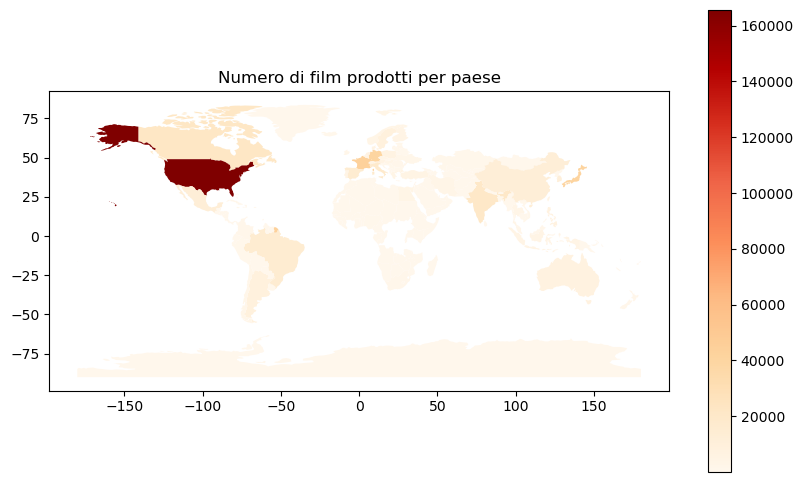

In [29]:
country_count = movies_per_year_df['country'].value_counts().reset_index()
country_count.columns = ['country','film_count']

world = gpd.read_file("./Geographical_data/ne_110m_admin_0_countries.shp")
#print(world['NAME'].unique())
country_count['country']= country_count['country'].replace('USA', 'United States of America')
merged = world.merge(country_count, left_on='NAME', right_on='country', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column='film_count', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Numero di film prodotti per paese')
plt.show()



<StringArray>
[                                  'UK',
                                  'USA',
                          'South Korea',
                              'Germany',
                            'Hong Kong',
                               'Canada',
                               'Sweden',
                              'Ireland',
                                'Japan',
                                'China',
 ...
    'Heard Island and McDonald Islands',
 'United States Minor Outlying Islands',
                       'Norfolk Island',
                         'Cook Islands',
                           'Montserrat',
                        'Bouvet Island',
                           'Seychelles',
                             'Maldives',
                              'Mayotte',
                                 'Guam']
Length: 247, dtype: string

## La bellezza di un film, può essere influenzata dalla durata?

0


## Nel tempo come si è evoluta la durata media dei film?

In [5]:
time_df =movies_df[['id', 'date', 'minute']].copy()
new_names = {'date':'year','minute': 'length'}
time_df=time_df.rename(columns=new_names)
time_df.head(10)


,id,year,length
0,1000001,2023.0,114.0
1,1000002,2019.0,133.0
2,1000003,2022.0,140.0
3,1000004,1999.0,139.0
4,1000005,2016.0,129.0
5,1000006,2023.0,181.0
6,1000007,2014.0,169.0
7,1000008,2019.0,122.0
8,1000009,2021.0,155.0
9,1000010,1994.0,154.0


In [6]:
time_df.dtypes

id          int64
year      float64
length    float64
dtype: object

In [7]:
time_df.dropna(axis=0, inplace=True)
print(time_df.duplicated().sum())

0


In [8]:
time_df['year'] = time_df['year'].astype(int)
time_df.dtypes


id          int64
year        int64
length    float64
dtype: object

In [9]:
time_df = time_df[time_df['length']>60]
average_length = time_df.groupby('year')['length'].mean().reset_index()
average_length.head(10)


,year,length
0,1899,135.000000
1,1900,79.000000
2,1903,120.000000
3,1904,70.000000
4,1906,87.500000
5,1907,155.000000
6,1908,135.500000
7,1910,85.600000
8,1911,87.600000
9,1912,94.153846


In [10]:
average_length['year'].unique()

array([1899, 1900, 1903, 1904, 1906, 1907, 1908, 1910, 1911, 1912, 1913,
       1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030])

In [11]:
average_length = average_length[average_length['year'] < 2025]
average_length['year'].unique()

array([1899, 1900, 1903, 1904, 1906, 1907, 1908, 1910, 1911, 1912, 1913,
       1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])

In [12]:
average_length['length'].unique()

array([135.        ,  79.        , 120.        ,  70.        ,
        87.5       , 155.        , 135.5       ,  85.6       ,
        87.6       ,  94.15384615,  98.16      , 113.02702703,
       110.475     , 105.39534884,  96.72560976,  96.05590062,
        94.15300546,  92.46190476,  92.24663677,  92.18518519,
        90.70671378,  86.14939024,  86.9637883 ,  85.1793722 ,
        88.30821918,  89.322     ,  86.1210084 ,  82.57461646,
        82.26593137,  81.85083532,  81.52238806,  83.25782093,
        82.91897655,  83.73855544,  85.88418933,  86.73838384,
        87.22052846,  87.63296703,  89.63856813,  89.06394708,
        89.60551559,  90.38719068,  89.61014493,  90.20663265,
        90.26564345,  90.59194777,  91.48095238,  91.88568935,
        92.39370748,  92.83817427,  93.00321027,  94.50657386,
        94.32639885,  93.4985755 ,  92.72005125,  93.52200868,
        94.49937186,  97.27020358,  94.84479718,  95.74120879,
        95.9238927 ,  98.23103448,  97.85435268,  97.09

In [28]:
fig = px.scatter(
    average_length,
    x="year",
    y="length",
    animation_frame="year",
    title="Evoluzione della lunghezza dei film negli anni",
    labels={'year': 'Anno', 'length': 'Durata (minuti)'},
    range_x=[1899, 2024],
    range_y=[60, 160]
)

# Modifica del tracciato per includere linea e marker
fig.update_traces(mode="lines+markers", marker=dict(size=15, color='blue'))

# Configurazione del layout
fig.update_layout(
    xaxis=dict(title="Anno"),
    yaxis=dict(title="Durata (minuti)"),
    showlegend=False
)
fig.add_trace(
    go.Scatter(
        x=average_length['year'],
        y=average_length['length'],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    )
)

fig.show()

Dopo un periodo di incertezza nei primi anni del '900 si può notare che la tendenza è stata quella di avere film sempre più corti, fino circa agli anni 30, quando la tendenza si è invertita, con film progressivamente più lunghi.